### TP2 Big Data : Cisse Cheikh - Michel Chloé

#### Université Paul Sabatier, M2MAPI3
# Big data - practical 2: perceptron and SVM
We advise to use [matplotlib](https://matplotlib.org/) for plots and [numpy](https://numpy.org/). The online documentation contains information regarding the use of these libraries how to use these libraries.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
import math as math
import numpy as np
import numpy.random as npr

## Exercice 1: estimation of the mean of a univariate random variable

Let $x_1,\ldots,x_n$ be a real numbers, their mean is given by
$$\bar{x} = \arg\min_y f(y) $$
Where 
$$f \colon y \mapsto \frac{1}{n} \sum_{i=1}^n (y-x_i)^2$$
The following code generates input data and plots f. 

**Question 0:** what are the inputs? what is the argmin? what is the min?

**Réponse 0.**

>  - Les entrées sont les données $x_1,\ldots,x_n$, qui dans le cas suivant sont des entiers allant de $1$ à $10$ (car $n=10$). 
> - L'argmin est la moyenne empirique des données, ici $\bar{x}$=5.5$. C'est l'unique minimiseur de la fonction $f$.
> - Le min est le min de la fonction $f$ donnée plus haut, ici le min est la somme des carrés des écarts entre les données et la moyenne empirique (car la moyenne empirique est l'argmin). Le min est $f(\bar{x})=8.25$

Empirical mean:
5.5


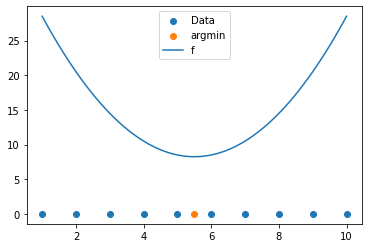

In [2]:
n = 10
x = np.linspace(1,10,10)
print("Empirical mean:")
print(np.mean(x))

plt.scatter(x, np.zeros(10), label = "Data")
plt.scatter(5.5, 0, label = "argmin")
y = np.linspace(10,100,100)/10
plt.plot(y, y**2 - 2 * np.mean(x) * y + np.mean(x**2), label = "f")
plt.legend()
plt.show()

**Question 1:** Implement the gradient descent algorithm on $f$ with $y_0 = 2$ and stepsize equal to $1/3$.
\begin{align*}
    y_{k+1} &= y_k - f'(y_k) / 3
\end{align*}

**Réponse 1.**

> On a :
> $$f' \colon y \mapsto \frac{2}{n} \sum_{i=1}^n (y-x_i)$$

In [3]:
'''
    Fonction f -> renvoie f(y) pour un y donné (où x est le vecteur de données)
'''
def f(y, x):

    # Inititalisation de la somme
    res = 0

    # On boucle sur les données
    for i in range(len(x)):

        # Différence au carrée
        res += (y - x[i])**2

    # On retourne la somme normalisée
    return res / len(x)

'''
    Fonction f' -> renvoie f'(y) pour un y donné (où x est le vecteur de données)
'''
def df(y, x):

    # Inititalisation de la somme
    res = 0

    # On boucle sur les données
    for i in range(len(x)):
        res += (y - x[i])

    # On retourne la somme normalisée * 2
    return 2 * res / len(x)

In [4]:
'''
    Algorithme de la descente de gradient pour la fonction f
'''
def gradient_descent(f, df, x, nbIter, stepsize=1/3, y0=2):

    # Initialisation de la liste des y
    Y = [y0]

    # On boucle sur le nombre d'itérations
    for i in range(nbIter):

        # Mise à jour de y
        Y.append(Y[-1] - stepsize * df(Y[-1], x))
        
    # On retourne la liste des y
    return Y

We set $f_k = f(y_k)$ for each $k$. Plot $f_k - f^*$ in logarithmic scale as a function of $k$. Plot the value of $|y_k - y^*|$, where $y^*$ is the argmin, as a function of $k$ in logarithmic scale. What can you say about these results? 

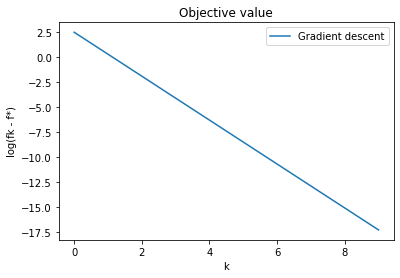

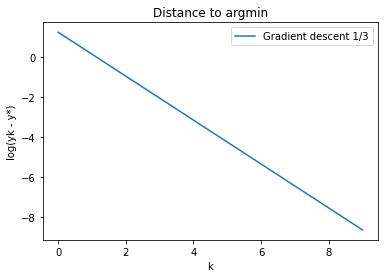

In [5]:
y_star = np.mean(x)
f_star = f(y_star, x)
k = 9

# On applique la descente de gradient sur f k fois
Y = gradient_descent(f, df, x, k, 1/3, 2)

# On calcule les log(fk - f*)
F = [np.log(f(y, x) - f_star) for y in Y]

# Affichage des la valeur objectif
plt.plot(F, label = 'Gradient descent')
plt.xlabel('k')
plt.ylabel('log(fk - f*)')
plt.title('Objective value')
plt.legend()
plt.show()

# Affichage de la distance à l'argmin en échelle logarithmique
plt.plot([np.log(np.abs(y - y_star)) for y in Y], label = 'Gradient descent 1/3')
plt.xlabel('k')
plt.ylabel('log(yk - y*)')
plt.title('Distance to argmin')
plt.legend()
plt.show()

**Réponse.**

> On peut dire que la descente de gradient converge vers la moyenne empirique, car on a $|y_k - y^*| \to 0$ et $f_k - f^* \to 0$. L'affichage ci-dessus étant en échelle $\log$, on peut dire que la convergence de l'algorithme vers la valeur objectif est exponentielle.

We are going to introduce minibatching strategies, we need the following
* $(\alpha_k)_{k \in \mathbb{N}}$ a sequence of positive step sizes
* $(I_k)_{k \in \mathbb{N}}$ a sequence of independant random integers uniformly distributed on $\{1,\ldots, n\}$.

**Question 2:** how can you simulate the sequence $(I_k)_{k \in \mathbb{N}}$? Provide an illustration below

**Réponse 2.**

> Grâce à `numpy.random.randint(0,n)`, on peut simuler une séquence d'entiers aléatoires indépendants et uniformément distribués sur $\{1,\ldots, n\}$.
>
>En réalité on va simuler une séquence d'entiers dans $\{0, \ldots, n-1\}$, car cela correspond à l'indicage en python.

In [6]:
for k in range(20):
    print("k =", k, ", random integer:", npr.randint(0, n))

k = 0 , random integer: 4
k = 1 , random integer: 1
k = 2 , random integer: 4
k = 3 , random integer: 6
k = 4 , random integer: 8
k = 5 , random integer: 8
k = 6 , random integer: 0
k = 7 , random integer: 8
k = 8 , random integer: 3
k = 9 , random integer: 0
k = 10 , random integer: 7
k = 11 , random integer: 0
k = 12 , random integer: 7
k = 13 , random integer: 7
k = 14 , random integer: 1
k = 15 , random integer: 6
k = 16 , random integer: 6
k = 17 , random integer: 7
k = 18 , random integer: 0
k = 19 , random integer: 8


The following algorithm is an application of the minibatch gradient descent strategy on $f$. To compute $\bar{x}$. 
given $y_0 \in \mathbb{R}$ and $(\alpha_k)_{k \in \mathbb{N}}$ a sequence of positive step sizes:
\begin{align*}
    I_k &\sim U(\{1,\ldots,n\})\\
    y_{k+1} &= y_k - \alpha_k (y_k - x_{I_k})
\end{align*}

**Question 3** What is the expectation of $y_{k+1}$ given $y_k$? How does this algorithm relate to the gradient descent algorithm? How is it different?

**Réponse 3.**

> On n'effectue plus une descente de gradient classique avec la direction de plus profonde descente, mais on choisit comme direction de descente ici la direction du vecteur $(y_k - x_{I_k})_{k \in \{1,...,n\}}$. $I_k$ est un indice tiré uniformement  sur $\{1,...,n\}$ 


**Question 4** Implement 300 iterations of this algorithm with $y_0 = 2$. Try constant step size $\alpha_k = \alpha$ for all $k$, with  $\alpha = 0.5, 0.1, 0.02$. Represent the iterates $y_k$ as a function of $k$. Make comments about the behavior of the algorithm. Is it similar to what you observed for gradient descent? How does the step size affects the result?

In [7]:
'''
    Algorithme de la descente de gradient minibatch pour la fonction f
'''
def minibatch_gradient_descent(x, nbIter, Alpha, y0=2):

    # Initialisation de la liste des y
    Y = [y0]

    # On boucle sur le nombre d'itérations
    for i in range(nbIter):

        # On tire un indice aléatoire
        I = npr.randint(0, n)

        # Mise à jour de y
        Y.append(Y[-1] - Alpha[i] * (Y[-1] - x[I]))

    # On retourne la liste des y et des indices
    return Y

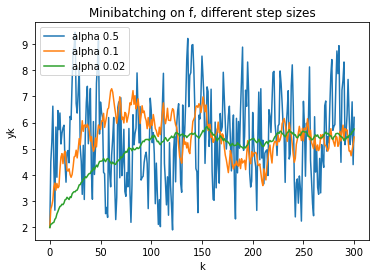

In [8]:
# On fixe k = 300
k = 300

# Test pour alpha = 0.5 (constant)
Y1 = minibatch_gradient_descent(x, k, [0.5] * k)

# Test pour alpha = 0.1 (constant)
Y2 = minibatch_gradient_descent(x, k, [0.1] * k)

# Test pour alpha = 0.02 (constant)
Y3 = minibatch_gradient_descent(x, k, [0.02] * k)

# Affichages des courbes
plt.plot(Y1, label = 'alpha 0.5')
plt.plot(Y2, label = 'alpha 0.1')
plt.plot(Y3, label = 'alpha 0.02')
plt.xlabel('k')
plt.ylabel('yk')
plt.title('Minibatching on f, different step sizes')
plt.legend()
plt.show()

**Réponse 4.**

> On remarque que, par rapport à l'algorithme de descente de gradient, la convergence ici n'est pas toujours assurée. La convergence dépend de la taille du pas $\alpha_k$, selon les courbes ci-dessus, le choix d'un petit pas semble adpaté.
>
> Si on prend un pas trop grand, on va laisser une trop grande part de hasard (dû aux indices tirés aléatoirement dans $I_k$) dans le calcul de $y_{k+1}$.
>
> Malgré tout, les $3$ courbes oscillent autour de la valeur objectif $5.5$.

**Question 5:** Try the same algorithm with a step size of the form $\alpha_k = 1 / (k+1)$ for all $k$. Represent three runs of the algorithm on the same graph with 1000 iterations. Comments the results. 

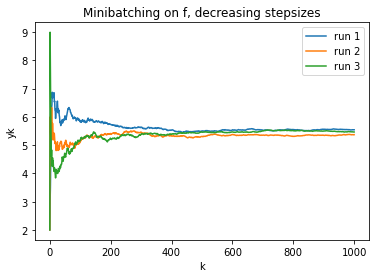

In [10]:
# On fixe k = 1000
k = 1000

# Pour k = 1000, on définit alpha_k = 1/(k+1) pour tout k
Alpha = 1 / (np.arange(0, k) + 1)

# Test pour alpha_k = 1/(k+1) -> 3 runs
Y4 = minibatch_gradient_descent(x, k, Alpha, 2)
Y5 = minibatch_gradient_descent(x, k, Alpha, 2)
Y6 = minibatch_gradient_descent(x, k, Alpha, 2)

# Affichages des 3 runs
plt.plot(Y4, label = 'run 1')
plt.plot(Y5, label = 'run 2')
plt.plot(Y6, label = 'run 3')
plt.xlabel('k')
plt.ylabel('yk')
plt.title('Minibatching on f, decreasing stepsizes')
plt.legend()
plt.show()

**Réponse 5.**
> Le choix d'un $\alpha$ qui decroit suivant $1 / (k+1)$ assure la convergence de l'algorithme vers la moyenne empirique $5.5$ au bout d'un certain nombre d'iterations $k > 250$


**Question 6:** Experiment with different step size regimes. Which conclusions can you make regarding these experiments? Comment on the sensitivity of the minibatch strategy to step sizes. Is the proposed minibatching strategy a good algorithm to estimate the mean? In which situation would it be favorable to use this strategy?

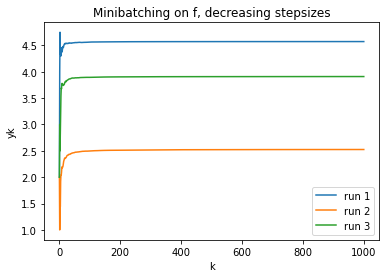

In [11]:
# On fixe k = 1000
k = 1000

# Pour k = 1000, on définit alpha_k = 1/(k+1)² pour tout k
Alpha = 1 / np.arange(1, k + 1)**2

# Test pour alpha_k = 1/(k+1) -> 3 runs
Y4 = minibatch_gradient_descent(x, k, Alpha, 2)
Y5 = minibatch_gradient_descent(x, k, Alpha, 2)
Y6 = minibatch_gradient_descent(x, k, Alpha, 2)

# Affichages des 3 runs
plt.plot(Y4, label = 'run 1')
plt.plot(Y5, label = 'run 2')
plt.plot(Y6, label = 'run 3')
plt.xlabel('k')
plt.ylabel('yk')
plt.title('Minibatching on f, decreasing stepsizes')
plt.legend()
plt.show()

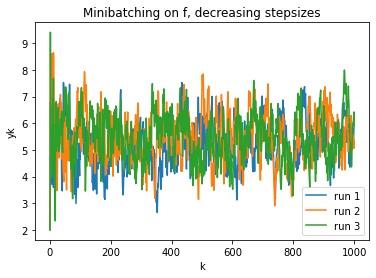

In [12]:
# On fixe k = 1000
k = 1000

# Pour k = 1000, on définit alpha_k = 1/log(k+2) pour tout k
Alpha = 1 / np.log(np.arange(2, k + 2))

# Test pour alpha_k = 1/(k+1) -> 3 runs
Y4 = minibatch_gradient_descent(x, k, Alpha, 2)
Y5 = minibatch_gradient_descent(x, k, Alpha, 2)
Y6 = minibatch_gradient_descent(x, k, Alpha, 2)

# Affichages des 3 runs
plt.plot(Y4, label = 'run 1')
plt.plot(Y5, label = 'run 2')
plt.plot(Y6, label = 'run 3')
plt.xlabel('k')
plt.ylabel('yk')
plt.title('Minibatching on f, decreasing stepsizes')
plt.legend()
plt.show()

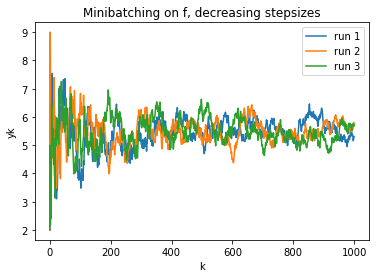

In [13]:
# On fixe k = 1000
k = 1000

# Pour k = 1000, on définit alpha_k = 1/sqrt(k+1) pour tout k
Alpha = 1 / np.sqrt(np.arange(1, k + 1))

# Test pour alpha_k = 1/(k+1) -> 3 runs
Y4 = minibatch_gradient_descent(x, k, Alpha, 2)
Y5 = minibatch_gradient_descent(x, k, Alpha, 2)
Y6 = minibatch_gradient_descent(x, k, Alpha, 2)

# Affichages des 3 runs
plt.plot(Y4, label = 'run 1')
plt.plot(Y5, label = 'run 2')
plt.plot(Y6, label = 'run 3')
plt.xlabel('k')
plt.ylabel('yk')
plt.title('Minibatching on f, decreasing stepsizes')
plt.legend()
plt.show()

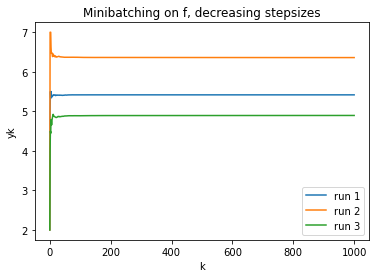

In [14]:
# On fixe k = 1000
k = 1000

# Pour k = 1000, on définit alpha_k = exp(-k) pour tout k
Alpha = 1 / np.arange(1, k + 1)**2

# Test pour alpha_k = 1/(k+1) -> 3 runs
Y4 = minibatch_gradient_descent(x, k, Alpha, 2)
Y5 = minibatch_gradient_descent(x, k, Alpha, 2)
Y6 = minibatch_gradient_descent(x, k, Alpha, 2)

# Affichages des 3 runs
plt.plot(Y4, label = 'run 1')
plt.plot(Y5, label = 'run 2')
plt.plot(Y6, label = 'run 3')
plt.xlabel('k')
plt.ylabel('yk')
plt.title('Minibatching on f, decreasing stepsizes')
plt.legend()
plt.show()

**Réponse 6.**

> Au vu des expériences ci-dessus, on peut dire que notre algorithme est très sensible aux choix de $\alpha_k$. En effet, si on choisit un $\alpha_k$ qui diminue trop vite, on risque de ne pas converger vers la moyenne empirique voire ne pas converger du tout vers cette moyenne.
>
> Le comportement est très variable d'un choix de $\alpha_k$ variable à l'autre.
>
> Le choix d'un pas constant semble trop incertain également, car on ne sait pas si on va converger ou non vers la moyenne empirique.

## Exercice 2: single layer perceptron (1957)

The following code provides a two label dataset in $\mathbb{R}^2$: $x_1,\ldots, x_n$ is a set of $n$ vectors in $\mathbb{R}^2$ and $y_1,\ldots,y_n$ are the corresponding labels ($-1$ or $1$). 

$X$ is a table of size $n \times 2$ and $y$ is a vector of labels of size $n$ (0 or 1). We also provide functions which allow to plot data and plot a line which equation is given by 
$$w^Tx + b = 0$$
for a vector $w \in \mathbb{R}^2$ and a bias term $b \in \mathbb{R}$.

In [15]:
## Generate data
n = 200
angles = 2 * math.pi * npr.rand(n) - math.pi / 4
radii = npr.rand(n) * 0.4 + 0.8
x1 = radii * np.cos(angles)
x2 = radii * np.sin(angles)
X = np.vstack((x1,x2)).transpose()
y = 1. * (angles > 3*math.pi/4) * 2 - 1

temp = y==-1.
X[temp,0] = X[temp,0] - 1
X[temp,1] = X[temp,1] + 0.5

## Functions for plots
def addline(w, b, label, xlim = (-2,1), ylim = (-1,2)):
    ## Adds a line to a plot
    if abs(w[1]) < 1e-3:
        ytemp = np.arange(ylim[0] * 100, ylim[1] * 100) / 100
        xtemp = - ytemp * w[1] / w[0] - b / w[0]
        tempSelect1 = (xtemp < xlim[1]) * (xtemp > xlim[0])
        tempSelect2 = (ytemp < ylim[1]) * (ytemp > ylim[0])
        xtemp = xtemp[tempSelect1 * tempSelect2]
        ytemp = ytemp[tempSelect1 * tempSelect2]
        plt.plot(xtemp, ytemp, label = label)
        plt.legend()
        
    else:
        xtemp = np.arange(xlim[0] * 100, xlim[1] * 100) / 100
        ytemp = - xtemp * w[0] / w[1] - b / w[1]
        tempSelect1 = (xtemp < xlim[1]) * (xtemp > xlim[0])
        tempSelect2 = (ytemp < ylim[1]) * (ytemp > ylim[0])
        xtemp = xtemp[tempSelect1 * tempSelect2]
        ytemp = ytemp[tempSelect1 * tempSelect2]
        plt.plot(xtemp, ytemp, label = label)
        plt.legend()


def plotData(X,y):
    ## Plot data
    for k in (-1,1):
        temp = y==k
        plt.plot(X[temp,0], X[temp,1], '.', label = k)

    plt.legend()
    plt.axis('equal')

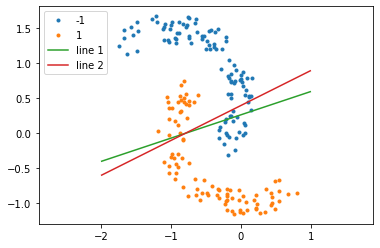

In [16]:
## Example of usage

plotData(X,y)
addline((1,-3), 0.8, "line 1")
addline((1,-2), 0.8, "line 2")

The perceptron algorithm aims at building a classifier of the form
\begin{align*}
    f_{w,b} \colon x \mapsto \mathrm{sign}(w^Tx + b)
\end{align*}
where $w \in \mathbb{R}^2$ and $b \in \mathbb{R}$ are weights and bias parameters.
The perceptron learning algorithm goes as follows: start with $w_0 \in \mathbb{R}^2$, $b_0 \in \mathbb{R}$ and iterate for $k \in \mathbb{N}$:
\begin{align*}
    &I_k  \sim U(\{1,\ldots, n\})\\
    &\begin{cases}
            w_{k+1} &= w_k + \alpha y_{I_k} x_{I_k} \qquad &b_{k+1} = b_k + \alpha y_{I_k}  \qquad &\text{ if } (w^Tx_{I_k}+b) y_{I_k} < 0 \\
        w_{k+1} &= w_k  \qquad &b_{k+1} = b_k  \qquad &\text{ otherwise }
    \end{cases}
\end{align*}
where $\alpha$ is a step parameter.

**Question 7:** Implement the algorithm and plot the data as well as the decision boundary given by the final iterate. Use the following parameters
* initialize weights $w$ and bias $b$ to be equal to $1$
* 500 iterations
* $\alpha_k = 1$ for all $k$.

Plot data and the decision boundary corresponding to 5 different runs on the same picture. Print also the value of the bias and weight vector at the last iteration.

**Réponse 7.**

In [17]:
def perceptron_algorithm(w0, b0, x, y, alpha, k):

    # Initialisation poids et biais
    w = w0
    b = b0

    # On fait k itérations
    for i in range(k):

        # On tire aléatoirement un indice
        I = npr.randint(0, len(x))

        # Mise à jour poids et biais
        if (np.dot(w, x[I,:]) + b) * y[I] < 0:
            w = w + alpha[i] * y[I] * x[I,:]
            b = b + alpha[i] * y[I]
    
    # On retourne poids et biais actualisés
    return w, b

run 0 weight and bias : 
 [-2.90334154 -3.37314178] -2.0
run 1 weight and bias : 
 [-1.86561502 -3.99312074] 0.0
run 2 weight and bias : 
 [-3.23438668 -3.2175255 ] -1.0
run 3 weight and bias : 
 [-2.02601561 -6.17004587] -1.0
run 4 weight and bias : 
 [-3.23468619 -4.02938587] 0.0


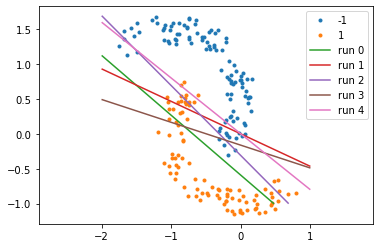

In [20]:
k = 500
alpha = [1] * k
w0 = np.array([1,1])
b0 = 1

plotData(X, y)

# On fait 5 runs
for _ in range(5):
   w, b = perceptron_algorithm(w0, b0, X, y, alpha, k)
   print("run",_,"weight and bias : \n", w, b) 
   addline(tuple(w), b, "run " + str(_))
plt.show()

**Question 8:** What happens if you increase the number of iterations or change the step size? Can you explain what you observe? Does the algorithm seem to converge?

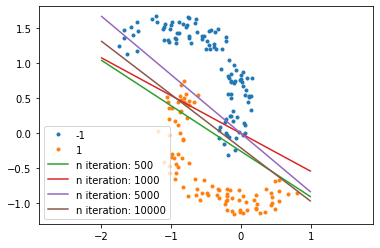

In [21]:
K = [500, 1000, 5000, 10000]

plotData(X,y)

for k in K:
    alpha = [1] * k
    w, b = perceptron_algorithm(w0, b0, X, y, alpha, k)
    addline(tuple(w), b, label = "n iteration: " + str(k) )
    plt.legend(loc = "best")
plt.show()

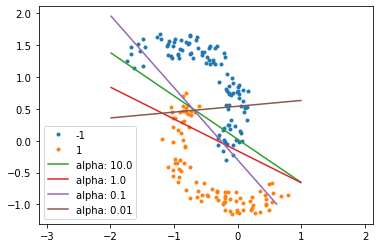

In [22]:
k = 1000
alpha = [1] * k
Alpha = [np.divide(alpha, l) for l in [1/10, 1, 10, 100]]

plotData(X,y)

for a in Alpha:
    alpha = [1] * k
    w, b = perceptron_algorithm(w0, b0, X, y, a, k)
    addline(tuple(w), b, label = "alpha: " + str(round(a[0], 2)))
    plt.legend(loc = "best")
plt.show()

**Réponse 8.**

> Plus on augmente les itérations, plus on ajuste correctement nos poids et biais. On observe une convergence au fur et à mesure des itérations.
>
> En revanche, un pas trop petit ne permet pas de converger vers la solution optimale.

**Question 9:** consider a sequence of step sizes of the form $\alpha_k = 1 / \sqrt{k+1}$ for all $k$? What happens when the number of iteration increases say to $4000$, or $40000$?

run 0 weight and bias : 
 [-0.11761969 -0.14232912] -0.019620923108468215
run 1 weight and bias : 
 [-0.35096635 -0.35810277] -0.08996175275966639
run 2 weight and bias : 
 [-0.14520318 -0.13248872] -0.04176345395588224
run 3 weight and bias : 
 [-0.11696106 -0.13534109] -0.009707492625935225
run 4 weight and bias : 
 [-0.13951643 -0.12047721] -0.032705315850509856


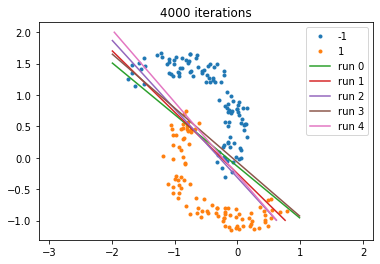

run 0 weight and bias : 
 [-0.02826889 -0.03085712] -0.008112859188183774
run 1 weight and bias : 
 [-0.01219515 -0.02833431] -0.006569637058841494
run 2 weight and bias : 
 [-0.02326119 -0.02514164] -0.0016342764646034378
run 3 weight and bias : 
 [-0.02145897 -0.02812724] -0.009476320543752456
run 4 weight and bias : 
 [-0.01904439 -0.02259366] 0.00034924068949801143


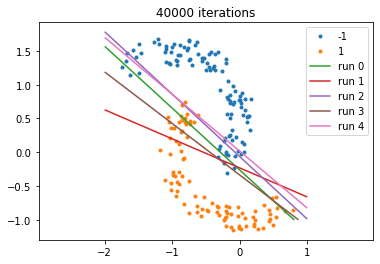

In [28]:
K = [4000, 40000]

for k in K:
    alpha = 1 / np.sqrt(np.arange(1, k+1))
    plotData(X,y)
    for i in range(5):
        w,b = perceptron_algorithm(w0, b0, X, y, alpha, k)
        print("run",i,"weight and bias : \n",w,b) 
        addline(tuple(w), b, "run " + str(i))
    plt.legend(loc = "best")
    plt.title(str(k) + " iterations")
    plt.show()

**Réponse 9.**
>La decroissante du pas aucours des iterations suivant $1/\sqrt{1+k}$ assure la convergence de l'algorithme au jusqu'a 4000 iterations. Pour des nombres d'iteration tres grands($40000$) c'est a dire des pas $\alpha$ tres petits L'algorithme semble etre perturbé. Les erreurs classification deviennent  plus importantes.


The perceptron algorithm attempts to minimize the following loss function 
\begin{align*}
    (perceptron) \qquad \min_{w,b} \frac{1}{n} \sum_{i=1}^n l_{\mathrm{perceptron}}(w^T x_i + b, y_i)
\end{align*}
where $l_{\mathrm{perceptron}}(s,y) = \max\{0, -ys\}$ for all $s$. It is actually a (sub)gradient method exactly of the same kind as what we have used in Exercise 1.

**Question 10:** Try to explain the preceeding algorithm in light of these elements. What is the solution to this minimization problem? Does it explain the behaviour observed in your experiments? Try to understand in which sense the algorithm is performing (sub)gradient descent, you may think about the loss function $l_{\mathrm{perceptron}}$ to be piecewise differentiable.

**Réponse 10.**


>L'algorithme de perceptron nous permet de trouver les poids $w$ et les biais $b$ qui permettent une classification correcte des entrees $x$. La fonction $l_{perceptron}$ est utilisee pour calculee l'erreur de classification pour chaque couple $(x_i,y_i)$ avec comme sortie du modele $s = w^{T}x_i + b$. Si le label $s$ est bien classé (a le meme signe que $y_i$) alors la fonction loss $l_{perceptron}$ retoune $0$.Autrement le loss vaut $-y_is$ une valeur negative. L'algorithme se termine lorsque le loss vaut $0$. Cette fonction loss est derivable par morceau avec comme valeur de derivee 0 si le loss vaut 0, -1 si le loss est negative.
> L'agorithme de perceptron effectue iterativement une mise a jour des valeurs de $w$ et de $b$ par descent de gradient sur le loss en fonction des poids et des biais.

## Exercise 3: Support Vector Machine
Make sure that you finish exercise 2 before starting this one.


The support vector machine is given by the solution of
\begin{align*}
    (SVM) \qquad \min_{w,b} C \sum_{i=1}^n l_{\mathrm{SVM}}(w^T x_i + b, y_i) + \frac{1}{2} \|w\|^2 
\end{align*}
where $l_{\mathrm{SVM}}(s,y) = \max\{0,1 -ys\}$ for all $s$.
The purpose of this section is to derive an algorithm following similar ideas as the perceptron to find a solution for the SVM problem. 



**Question 11:** use [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) from `scikit-learn` library to solve the SVM problem for $C=1/10$. The kernel should be `'linear'`. Provide the value for the weight and intercept solutions. What happens if you change the value of $C$?

In [29]:
from sklearn.svm import SVC

In [30]:
C = 1 / 10
clf = SVC(C = C, kernel = 'linear')
clf.fit(X, y)

SVC(C=0.1, kernel='linear')

In [31]:
weights = clf.coef_[0]
bias = clf.intercept_[0]

print("Poids : ", weights)
print("Biais : ", bias)

Poids :  [-0.72258113 -1.40613951]
Biais :  -0.07322978932623116


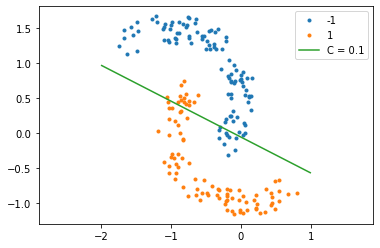

In [32]:
plotData(X,y)
addline(tuple(weights), bias, "C = " + str(C))
plt.legend(loc = "best")
plt.show()

Poids :  [-0.72258113 -1.40613951]
Biais :  -0.07322978932623116
C :  0.1
Poids :  [-2.218541  -2.8146748]
Biais :  -0.4431301584195719
C :  1
Poids :  [-3.18180865 -3.94935862]
Biais :  -0.5244505308142166
C :  5
Poids :  [-3.54097001 -4.32866003]
Biais :  -0.6415303927302962
C :  10
Poids :  [-3.93014926 -5.04498635]
Biais :  -0.7447611512592845
C :  40
Poids :  [-4.26517334 -5.41257141]
Biais :  -0.8077542761020332
C :  100


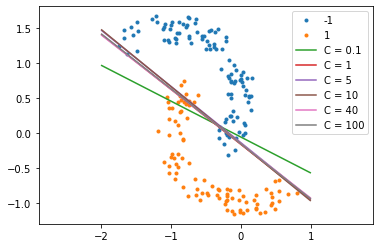

In [35]:
C = [0.1, 1, 5, 10, 40, 100]
kernel = 'linear'

plotData(X,y)

for c in C:
    clf = SVC(C = c, kernel = kernel)
    clf.fit(X, y)

    weights = clf.coef_[0]
    bias = clf.intercept_[0]

    print("Poids : ", weights)
    print("Biais : ", bias)
    print("C : ", c)

    addline(tuple(weights), bias, "C = " + str(c))
    plt.legend(loc = "best")
plt.show()

**Réponse 11.**

> On constate qu'une grande variété de $C$ mène à la convergence de l'algorithme. Cependant, pour des valeurs de $C$ petites on observe de moins bons résultats.

**Question 12:** We are going to consider an intermediate problem which is simpler than the SVM problem. Consider the unregularized SVM
\begin{align*}
    (pseudo-SVM) \qquad \min_{w,b} \frac{1}{n}\sum_{i=1}^n l_{\mathrm{SVM}}(w^T x_i + b, y_i)
\end{align*}
By analogy with the perceptron (the loss is almost the same), derive an algorithm to solve this problem. Perform the same experiment as what you did with the perceptron, using the following parameters
* initialize weights $w$ and bias $b$ to be equal to $0$
* 1000 iterations
* $\alpha_k = 1 / \sqrt{1+k}$ for all $k$.

What happens? What is the difference with the perceptron? Comment on the importance of the loss function.

In [36]:
def pseudo_svm(w0, b0, x, y, alpha, k):

    # Initialisation poids et biais
    w = w0
    b = b0

    # On fait k itérations
    for i in range(k):

        # On tire aléatoirement un indice
        I = npr.randint(0, len(x))

        # Mise à jour poids et biais selon la condition pseudo-svm
        if (np.dot(w, x[I,:]) + b) * y[I] < 1:
            w = w + alpha[i] * y[I] * x[I,:]
            b = b + alpha[i] * y[I]
    
    # On retourne poids et biais actualisés
    return w, b

run 0 weight and bias : 
 [-1.9876362  -2.63863227] -0.3182174284809013
run 1 weight and bias : 
 [-2.1426514 -2.7096061] -0.4397181390131911
run 2 weight and bias : 
 [-1.91177726 -2.87563813] -0.47903594676521344
run 3 weight and bias : 
 [-1.99246547 -2.79206751] -0.6119013787287494
run 4 weight and bias : 
 [-2.10431062 -2.81620631] -0.7234805626824145


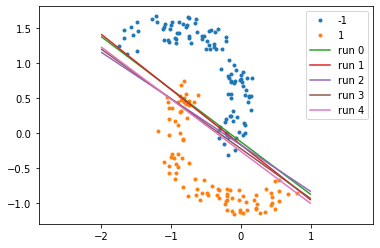

In [45]:
k = 1000
alpha = 1 / np.sqrt(np.arange(1, k+1))
w0 = np.array([0,0])
b0 = 0
plotData(X, y)

for _ in range(5):
   w, b = pseudo_svm(w0, b0, X, y, alpha, k)
   print("run",_,"weight and bias : \n", w, b) 
   addline(tuple(w), b, "run " + str(_))
plt.show()

**Réponse 12.**

> On constate ici que l'algorithme est très stable, il converge vers la même solution pour tous les runs. La convergence est également très rapide, on obtient une solution très proche de la solution optimale en $1000$ itérations.
>
> En effet, la fonction de perte $l_{SVM}$ semble plus adaptée à la classification que la fonction de perte du perceptron $l_{perceptron}$.

**Question 13:** Based on the previous question, devise an algorithm for the $(SVM)$ problem. This should be based on the response of question 11 with the idea that $(SVM)$ is a linear combination between the loss of $(pseudo-SVM)$ and the $L^2$ norm which gradient you know, with scaling factors $Cn$ and $1/2$. Reproduce the preceeding experiment with the following setting
* initialize weights $w$ and bias $b$ to be equal to $0$
* 10000 iterations
* $\alpha_k = 1 / (50 + k)$ for all $k$.

Which difference do you notice? Can you explain it?

In [48]:
def svm_algo(w0, b0, C, x, y, alpha, k):

    # Initialisation poids et biais
    w = w0
    b = b0
    n = len(x)

    # On fait k itérations
    for i in range(k):

        # On tire aléatoirement un indice
        I = npr.randint(0, n)

        # Mise à jour poids et biais selon la condition pseudo-svm
        if (np.dot(w, x[I,:]) + b) * y[I] < 1:
            w = w + alpha[i] * (C * n * y[I] * x[I,:] - w)
            b = b + alpha[i] * C * n * y[I]

        else:
            w = w - alpha[i] * w
            b = b
    
    # On retourne poids et biais actualisés
    return w, b

run 0 weight and bias : 
 [-0.73445919 -1.40631884] -0.044267315255009314
run 1 weight and bias : 
 [-0.7195358  -1.42380389] -0.08997988916964858
run 2 weight and bias : 
 [-0.76633445 -1.3994098 ] -0.08717413486908904
run 3 weight and bias : 
 [-0.70467383 -1.40769086] -0.05544244322478608
run 4 weight and bias : 
 [-0.71598189 -1.39993361] -0.09982608938815388


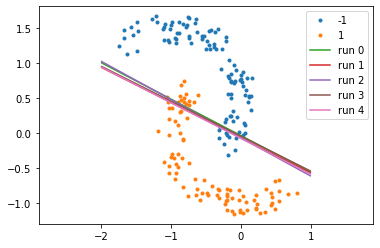

In [51]:
k = 10000
C = 1/10
alpha = 1 / (50 + np.arange(0, k))
w0 = np.array([0,0])
b0 = 0

plotData(X, y)

for _ in range(5):
   w, b = svm_algo(w0, b0, C, X, y, alpha, k)
   print("run",_,"weight and bias : \n", w, b) 
   addline(tuple(w), b, "run " + str(_))
plt.show()

**Réponse 13.**

> On ajuste maintenant le paramètre $C$ à chaque itération. On constate que la convergence est meilleure. L'algorithme est également plus stable, on obtient sensiblement la même solution pour tous les runs.

**Question 14:** Consider the previous experiment, for a single run, plot the distance between the current iterate and the solution given by `scikit-learn` in logarithmic scale. Plot data points should be computed every 100 iterates

**Réponse 14.**

In [52]:
def svm_algo_convergence(w0, b0, C, x, y, alpha, k):

    # Initialisation poids et biais
    w = w0
    b = b0
    n = x.shape[0]

    # Solution avec sklearn
    clf = SVC(C=C,kernel='linear')
    clf.fit(x, y)
    w_star = clf.coef_[0]
    b_star = clf.intercept_

    # Liste des erreurs
    error = []

    # On fait k itérations
    for i in range(k):

        # On tire aléatoirement un indice
        I = npr.randint(0, n)

        # Mise à jour poids et biais selon
        if (np.dot(w, x[I]) + b) * y[I] < 1:
            w = w + alpha[i] * (C * n * y[I] * x[I] - w)
            b = b + alpha[i] * C * n * y[I]

        else:
            w = w - alpha[i] * w
            b = b

        if (i+1)%100 == 0:
            error.append(np.sqrt(np.linalg.norm(w_star - w)**2 + np.linalg.norm(b_star - b)**2))

    # On retourne le vecteur des erreurs
    return error

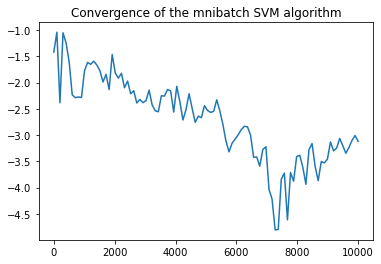

In [54]:
k = 10000
C = 1/10
w0 = np.array([0,0])
b0 = 0

error = svm_algo_convergence(w0, b0, C, X, y, alpha, k)

# Affichage
plt.plot(np.linspace(0, k, 100), np.log(error))
plt.title("Convergence of the mnibatch SVM algorithm")
plt.show()

**Question 15:** Given $S_k = \frac{1}{k} \sum_{i=1}^k w_i$ and $w_{k+1}$, find a simple formula for $S_{k+1} = \frac{1}{k+1} \sum_{i=1}^{k+1} w_i$ without recomputing the sum.

Consider the previous experiment, but instead of $w_k$ and $b_k$ use the averages over all previously seen iterations:
\begin{align*}
    \bar{w}_k = \frac{1}{k} \sum_{i=1}^k w_i \\
    \bar{b}_k = \frac{1}{k} \sum_{i=1}^k b_i \\
\end{align*}
What is the effect of averaging? Use step size $\alpha_k = 0.1 / (500 +  \sqrt{k})$ for all $k$. What do you observe?

**Réponse 15.**

> - $S_{k+1} = \frac{k}{k+1} S_k + \frac{1}{k+1} w_{k+1} = \frac{1}{k+1} (kS_k + w_{k+1})$
> - On constate que l'erreur ne semble plus osciller, la convergence paraît lisse.

In [55]:
def svm_mean_convergence(w0, b0, c, x, y, k):

    # Initialisation poids et biais
    w = w0
    b = b0
    n = x.shape[0]

    # Moyenne des poids et biais
    w_mean = w
    b_mean = b

    # Solution avec sklearn
    clf = SVC(C=c, kernel='linear')
    clf.fit(x, y)
    w_star = clf.coef_[0][:]
    b_star = clf.intercept_[0]

    # Liste des erreurs
    error = []

    # On fait k itérations
    for i in range(k):

        # Calcul du pas
        alpha = 0.1 / (500 + np.sqrt(i))

        # On tire aléatoirement un indice
        I = npr.randint(0, n)

        # Mise à jour poids et biais selon
        if (np.dot(w, x[I,:]) + b) * y[I] < 1:
            w = w + alpha * (c * n * y[I] * x[I,:] - w)
            b = b + alpha * c * n * y[I]

        else:
            w = w - alpha * w
            b = b

        # Mise à jour moyenne
        w_mean = (i * w_mean + w) / (i + 1)
        b_mean = (i * b_mean + b) / (i + 1)

        if (i+1)%100 == 0:
            error.append(np.sqrt(np.linalg.norm(w_mean - w_star)**2 + np.linalg.norm(b_star - b_mean)**2))

    # On retourne le vecteur des erreurs
    return error

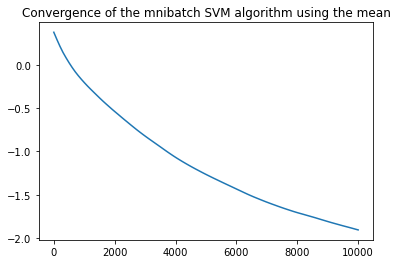

In [56]:
k = 10000
C = 1/len(x)
w0 = np.array([0,0])
b0 = 0

error = svm_mean_convergence(w0, b0, C, X, y, k)

# Affichage
plt.plot(np.linspace(0, k, 100), np.log(error))
plt.title("Convergence of the mnibatch SVM algorithm using the mean")
plt.show()

## Exercice 4: Back to the perceptron.

**Bonus question:** Getting back to the perceptron algorithm, run the algorithm with the following parameters
* initialize weights $w$ and bias $b$ to be equal to $1$
* 100000 iterations
* $\alpha_k = 10 / (10 + k)$ for all $k$.

Represent $5$ runs of the algorithm. What do you observe? In which sense does the algorithm seem to converge? If you can find a consistent explaination with a correct mathematical proof, I invite you to the restaurant.

run 0 weight and bias : 
 [-0.23399461 -0.26845189] -0.05248913747716739
run 1 weight and bias : 
 [-0.1296158  -0.14720379] -0.02890944358289577
run 2 weight and bias : 
 [-0.26761484 -0.30771195] -0.060119884560113857
run 3 weight and bias : 
 [-0.03835421 -0.04493294] -0.008926581913868544
run 4 weight and bias : 
 [-0.30487074 -0.35011858] -0.06770400137598133


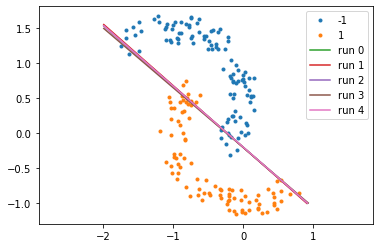

In [57]:
k = 100000
alpha = 10 / (10 + np.arange(0, k))
w0 = np.array([1,1])
b0 = 1

plotData(X, y)

# On fait 5 runs
for _ in range(5):
   w, b = perceptron_algorithm(w0, b0, X, y, alpha, k)
   print("run",_,"weight and bias : \n", w, b) 
   addline(tuple(w), b, "run " + str(_))
plt.show()

**Réponse bonus.**

> A FAIRE

>Avec $100000$ iterations et un pas $\alpha_k = \frac{10}{10+k}$ la mise a jour sur les poids et les biais sont de plus en plus petites ce qui permet a l'algorithme de converger vers  la meilleur separation possible des donnees sans surpassement ( les droites sont presque confondus).Cependant nos donnees ne sont pas lineairement separable. Il existera toujours des   erreur de classification pour les $x$ se trouvant autour de la frontiere entre les  deux classes.